## <h1>CAPSTONE PROJECT</h1>
## <h2>STOCK PRICE PREDICTION</h2>

<p>
Welcome to this Jupyter Notebook, where we will explore the art of predicting Google's stock price. Google, part of Alphabet Inc., is a global tech giant, and understanding its stock trends is of great significance. We will employ the tools of data analysis and machine learning to decipher the intricate world of market dynamics. Through systematic analysis, we aim to uncover patterns and insights that will guide us in projecting the future course of Google's stock. Join us as we deconstruct the complexities of stock price prediction in the digital age.
</p>

In [92]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#First we need to download the data and put it in a dataframe
#We will require google's data, S&P500 and the NASDAQ as exogenous data
start = '2005-01-01'
end = '2023-10-20'
google_data = yf.download('GOOGL',start=start,end=end)
SnP500_data = yf.download('SPY',start = start,end = end)
NAS_data = yf.download('^IXIC',start = start,end = end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


We have downloaded the data from yahoofinance and put them in their own dataframes

In [3]:
print(NAS_data.isnull().sum(),SnP500_data.isnull().sum(),google_data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Data cleaning
Since we do not have any null values, let's get to the part of the data that we need.
We need to use the closing price to predict our data so we will keep two columns, close and volume column

In [4]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,4.939940,5.096096,4.891391,5.072823,5.072823,633134232
2005-01-04,5.040040,5.078328,4.841842,4.867367,4.867367,549685764
2005-01-05,4.841091,4.927427,4.810561,4.842593,4.842593,329134536
2005-01-06,4.881882,4.902402,4.697698,4.718468,4.718468,415068516
2005-01-07,4.770771,4.861111,4.724224,4.851101,4.851101,386129484


In [5]:
google = google_data.copy()
snp500 = SnP500_data.copy()
nas = NAS_data.copy()
columns_to_drop = {'Open','High','Low','Adj Close'}
google = google.drop(columns=columns_to_drop)
nas = nas.drop(columns = columns_to_drop)
snp500 = snp500.drop(columns = columns_to_drop)

In [6]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2005-01-03 to 2023-10-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   4732 non-null   float64
 1   Volume  4732 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 110.9 KB


In [7]:
# The data is in datetime index which is a good thing

## Data analysis

In [8]:
google.describe()

,Close,Volume
count,4732.000000,4.732000e+03
mean,41.725591,1.162725e+08
std,37.731040,1.430952e+08
min,4.379129,9.312000e+06
25%,13.172860,3.175550e+07
50%,27.240250,6.310683e+07
75%,57.793375,1.404085e+08
max,149.838501,1.643023e+09


In [9]:
google.shape , snp500.shape , nas.shape

((4732, 2), (4732, 2), (4732, 2))

In [10]:
#Lets calculate the correlation
correlation = google.corr()
correlation

,Close,Volume
Close,1.000000,-0.463131
Volume,-0.463131,1.000000


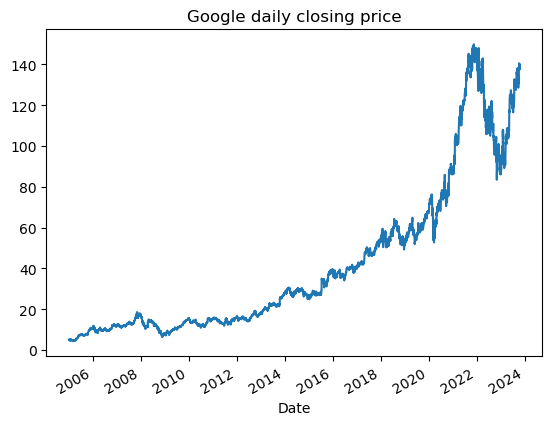

In [11]:
google['Close'].plot()
plt.title("Google daily closing price")
plt.show()

In [12]:
#Let's add the returns column in all our data
google['returns'] = google['Close'].pct_change()*100
snp500['returns'] = snp500['Close'].pct_change()*100
nas['returns'] = nas['Close'].pct_change()*100


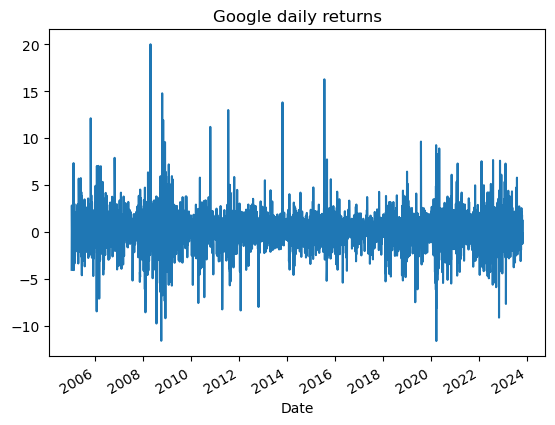

In [13]:
google['returns'].plot()
plt.title("Google daily returns")
plt.show()

First we need to fill the null with a value

In [14]:
google = google.fillna(method='bfill')
snp500 = snp500.fillna(method='bfill')
nas = nas.fillna(method='bfill')

Lets check for stationarity in our data

In [15]:
import statsmodels.tsa.stattools as sts

sts.adfuller(google.returns)

(-29.899807158869482,
 0.0,
 5,
 4726,
 {'1%': -3.4317344382982022,
  '5%': -2.8621517642166197,
  '10%': -2.567095644175108},
 19302.221792075456)

In [16]:
sts.adfuller(snp500.returns)

(-17.23536330930067,
 6.155304187806022e-30,
 17,
 4714,
 {'1%': -3.4317379644584283,
  '5%': -2.8621533220147395,
  '10%': -2.567096473458761},
 15158.04311279143)

In [17]:
sts.adfuller(nas.returns)

(-17.411833715890147,
 4.880891780791214e-30,
 15,
 4716,
 {'1%': -3.4317373755182086,
  '5%': -2.862153061831011,
  '10%': -2.5670963349516307},
 16246.05256339486)

The result of the Augmented Dickey-Fuller (ADF) test:

Interpreting these results:

1. **ADF Statistic**: The ADF Statistic is a test statistic used in the ADF test. This statistic is used to assess whether a time series is stationary or non-stationary. The more negative the ADF Statistic, the stronger the evidence against the null hypothesis (i.e., the data is non-stationary).

2. **p-value**: The p-value is a measure of the strength of evidence against the null hypothesis. In this case, the p-value is very close to zero or zero, indicating strong evidence to reject the null hypothesis. A small p-value suggests that the data is likely stationary.

3. **Number of Lags Used**: lags were used in the regression when performing the ADF test. The number of lags can vary depending on the test setup.

4. **Number of Observations Used**: The ADF test used 4716 observations in your time series data.

5. **Critical Values**: These are the critical values for different levels of significance (1%, 5%, and 10%). They are used to compare with the ADF Statistic. If the ADF Statistic is more negative than the critical values, it provides further evidence that the data is stationary. In your case, the ADF Statistic is indeed more negative than all the critical values, further supporting stationarity.

6. **Maximized Information Criterion (AIC)**: The AIC is a measure used in model selection. While it's not directly related to the stationarity test, it's sometimes included in the ADF test results. It's used to compare the quality of different models, and lower AIC values indicate a better model fit.

In summary, the small p-value and the fact that the ADF Statistic is more negative than the critical values indicate strong evidence against the null hypothesis of non-stationarity. This suggests that the time series data in question is likely stationary.

In [18]:
#Let's create a volatility column
google['volatility'] = google['returns'].rolling(window=5).std()
nas['volatility'] = nas['returns'].rolling(window=5).std()
snp500['volatility'] = snp500['returns'].rolling(window=5).std()

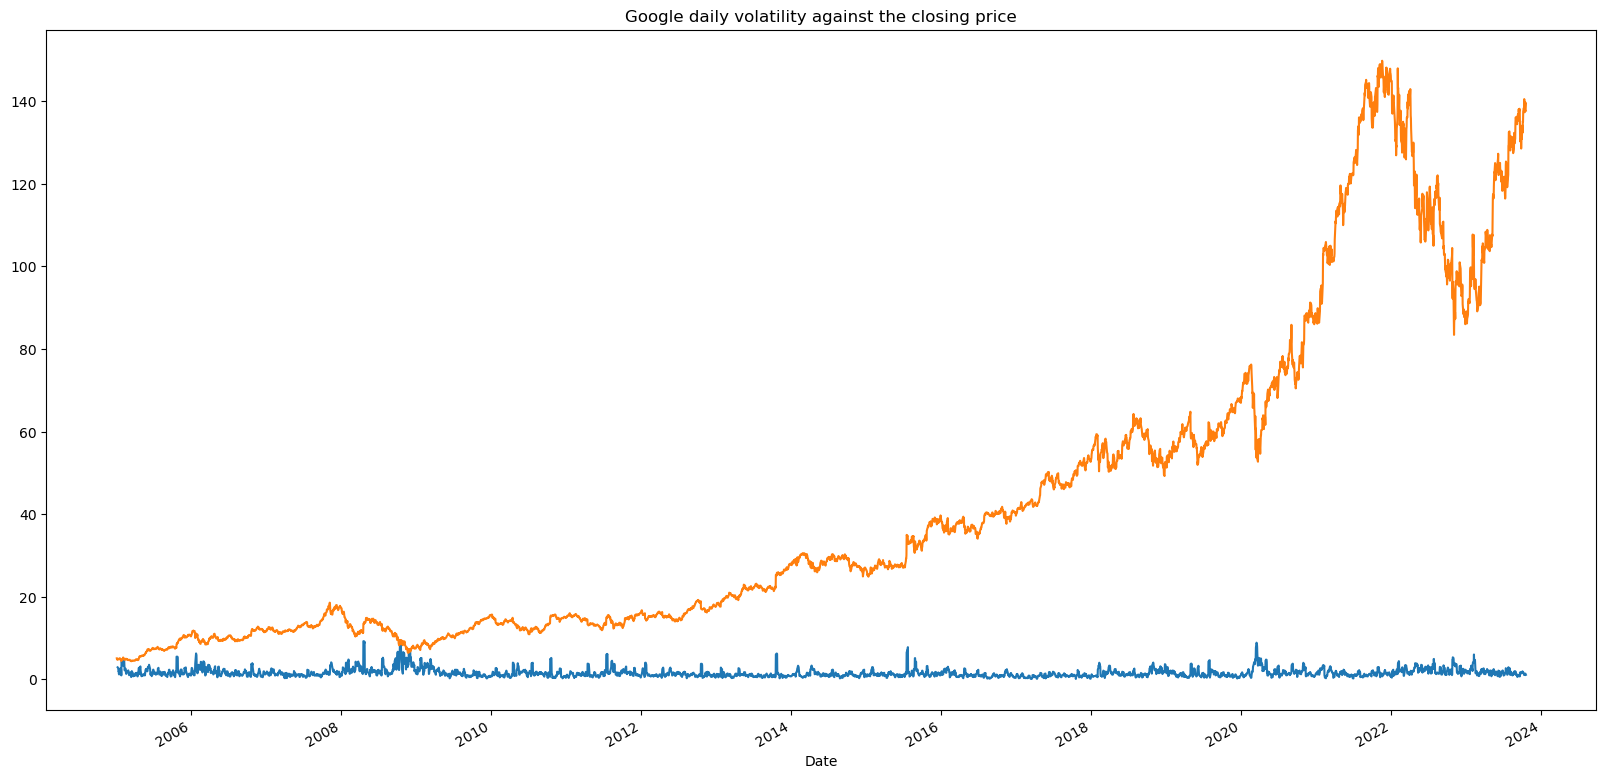

In [19]:
plt.figure(figsize=(20,10))
google['volatility'].plot()
google['Close'].plot()
plt.title("Google daily volatility against the closing price")
plt.show()

In [20]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2005-01-03 to 2023-10-19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close       4732 non-null   float64
 1   Volume      4732 non-null   int64  
 2   returns     4732 non-null   float64
 3   volatility  4728 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 184.8 KB


Let's check for seasonality in our data

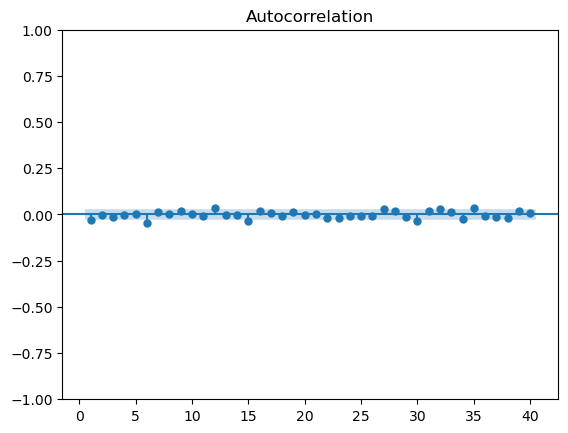

<Figure size 2000x1000 with 0 Axes>

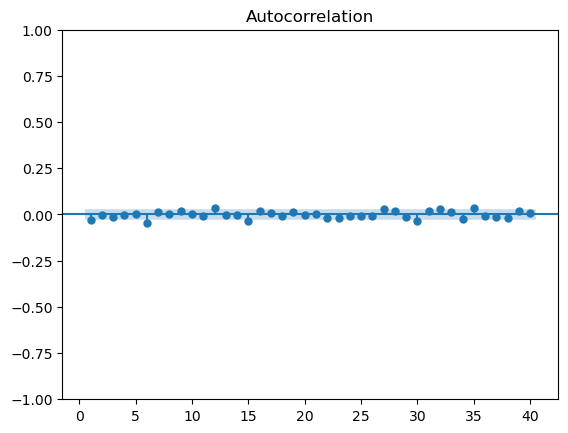

In [21]:
import statsmodels.graphics.tsaplots as sgt
plt.figure(figsize=(20,10))
sgt.plot_acf(google.returns,zero=False,lags = 40)

We can see by using the returns column, the first 5 lags are significant and can be set as the minimum number of lags used. this was also asserted in the adfuller test

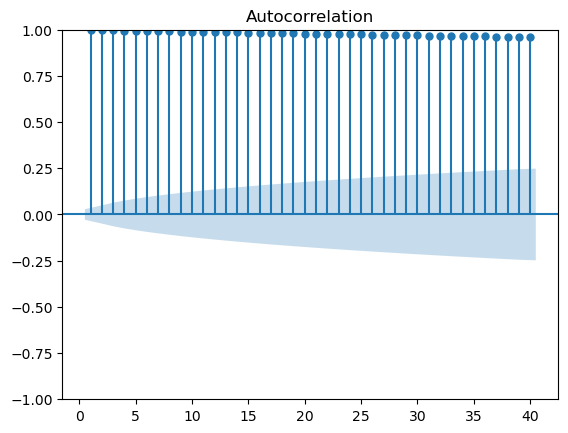

<Figure size 2000x1000 with 0 Axes>

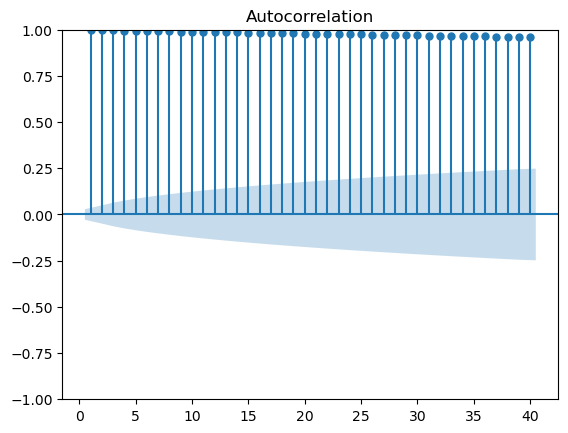

In [22]:
plt.figure(figsize=(20,10))
sgt.plot_acf(google.Close,lags = 40,zero=False)

From using thecloing prices, we can see that all the previous data is significant in predicting the next value. This is a common characteristic with non-stationary data and this implies that it cannot be used with algorithms such as AR, MA ,ARMA SARMA and such since these are algorithms for stationary data

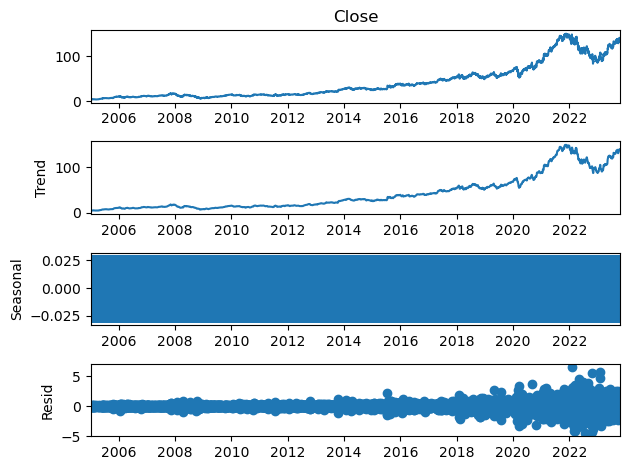

<Figure size 2000x1000 with 0 Axes>

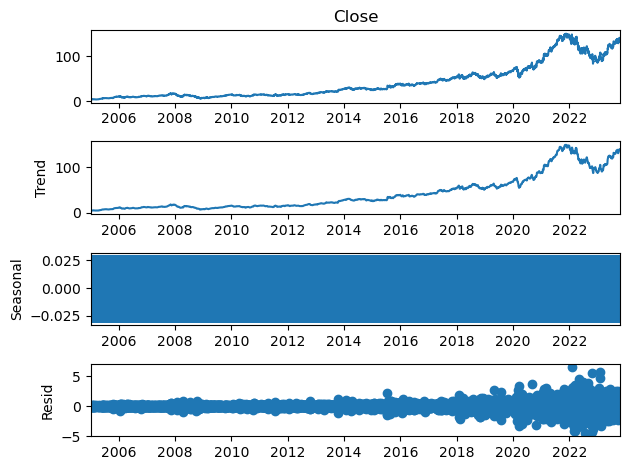

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

google = google.asfreq('B')
snp500 = snp500.asfreq('B')
nas = nas.asfreq('B')
google = google.fillna(method='ffill')
nas = nas.fillna(method='ffill')
snp500 = snp500.fillna(method='ffill')
plt.figure(figsize=(20,10))
s_dec = seasonal_decompose(google.Close, model="additive")
s_dec.plot()

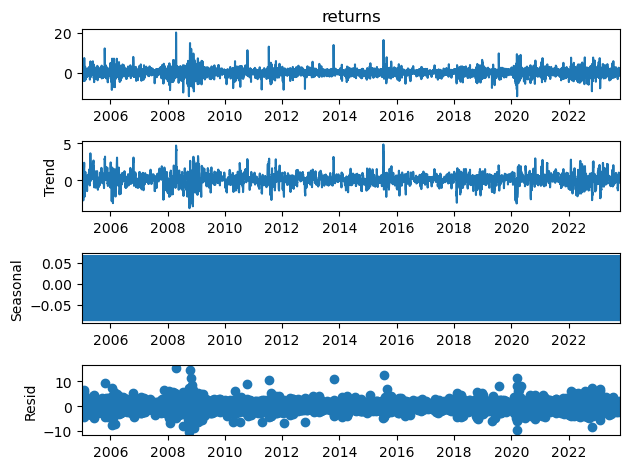

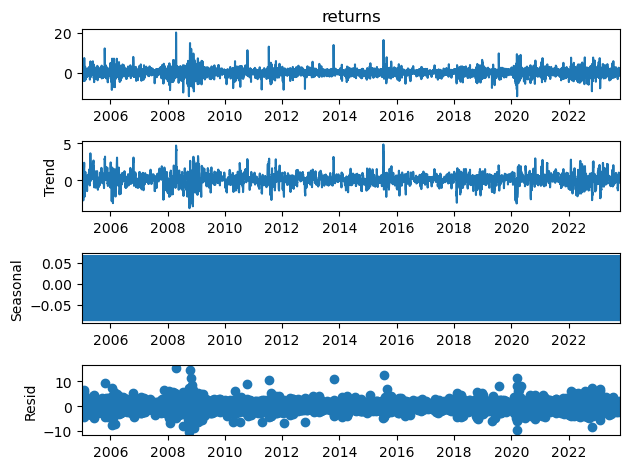

In [24]:
s_dec = seasonal_decompose(google.returns, model="additive")
s_dec.plot()

In [25]:
#Splitting the data
size = int(len(google)*0.8)
train_google ,test_google = google.iloc[:size],google.iloc[size:]
train_nas ,test_nas = nas.iloc[:size],nas.iloc[size:]
train_snp ,test_snp = snp500.iloc[:size],snp500.iloc[size:]

## <h1>Modelling</h1>

From our analysis, we can see that the data we are using is more likely to be non-stationary. So we need to choose algorithms that can handle non-stationary data

<h1>1: ARIMA</h1>

In [26]:
google.shape , snp500.shape , nas.shape

((4904, 4), (4904, 4), (4904, 4))

In [27]:
google.head()

,Close,Volume,returns,volatility
Date,,,,
2005-01-03,5.072823,633134232.0,-4.050136,NaN
2005-01-04,4.867367,549685764.0,-4.050136,NaN
2005-01-05,4.842593,329134536.0,-0.508973,NaN
2005-01-06,4.718468,415068516.0,-2.563193,NaN
2005-01-07,4.851101,386129484.0,2.810928,2.896315


In [28]:
print(google.duplicated().sum())

172


In [29]:
google = google.drop_duplicates()
snp500 = snp500.drop_duplicates()
nas = nas.drop_duplicates()

In [30]:
google.shape , snp500.shape , nas.shape

((4732, 4), (4732, 4), (4732, 4))

In [31]:
train_google.shape,train_snp.shape,test_google.shape,test_snp.shape

((3923, 4), (3923, 4), (981, 4), (981, 4))

In [32]:
nas = nas.fillna(method='bfill')
snp500 = snp500.fillna(method='bfill')

In [33]:
#We will perform an LLR test to see which model performs best
from scipy.stats.distributions import chi2
def llr_test(model_1, model_2,df=1):
    """df is the degree of freedom.The Likelihood Ratio Test (LLR) is a statistical test used to compare the goodness of fit of two nested models, typically in the context of maximum likelihood estimation. The primary purpose of the LLR test is to determine whether a more complex model provides a statistically significant improvement in fit compared to a simpler, nested model.
    @:param model_1: the simpler model
    """
    l1 = model_1.fit().llf
    l2 = model_2.fit().llf
    lr = (2*(l2-l1))
    p = chi2.sf(lr,df).round(3)
    return p

In [37]:
from statsmodels.tsa.arima.model import ARIMA

arima_AR1_MA1_D1 = ARIMA(endog=google.returns, order=(1, 1, 1),exog=snp500.returns)
result = arima_AR1_MA1_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -8429.703
Date:                Sat, 21 Oct 2023   AIC                          16867.406
Time:                        09:26:21   BIC                          16893.253
Sample:                             0   HQIC                         16876.490
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0123      0.014     73.453      0.000       0.985       1.039
ar.L1          0.0149      0.011      1.414      0.157      -0.006       0.035
ma.L1         -1.0000      0.157     -6.362      0.000      -1.308      -0.692
sigma2         2.0625      0.326      6.321      0.000       1.423       2.702
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             73052.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
arima_AR2_MA2_D1 = ARIMA(endog=google.returns, order=(2, 1, 2),exog=snp500.returns)
result = arima_AR2_MA2_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -8429.688
Date:                Sat, 21 Oct 2023   AIC                          16871.375
Time:                        09:26:25   BIC                          16910.146
Sample:                             0   HQIC                         16885.002
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0123      0.014     73.083      0.000       0.985       1.039
ar.L1         -0.9805      0.052    -18.802      0.000      -1.083      -0.878
ar.L2          0.0145      0.011      1.372      0.170      -0.006       0.035
ma.L1         -0.0046      0.060     -0.077      0.939      -0.121       0.112
ma.L2         -0.9954      0.057    -17.339      0.000      -1.108      -0.883
sigma2         2.0626      0.064     32.099      0.000       1.937       2.188
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72902.03
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
arima_AR3_MA3_D1 = ARIMA(endog=google.returns, order=(3,1,3),exog=snp500.returns)
result_ar3_ma3 = arima_AR3_MA3_D1.fit()
result_ar3_ma3.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -8428.193
Date:                Sat, 21 Oct 2023   AIC                          16872.385
Time:                        09:32:42   BIC                          16924.080
Sample:                             0   HQIC                         16890.554
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0133      0.014     72.342      0.000       0.986       1.041
ar.L1         -1.1001      0.031    -35.975      0.000      -1.160      -1.040
ar.L2         -0.9475      0.029    -32.441      0.000      -1.005      -0.890
ar.L3          0.0074      0.011      0.645      0.519      -0.015       0.030
ma.L1          0.1203      0.028      4.273      0.000       0.065       0.175
ma.L2         -0.1526      0.026     -5.873      0.000      -0.204      -0.102
ma.L3         -0.9619      0.028    -34.527      0.000      -1.017      -0.907
sigma2         2.0635      0.014    143.993      0.000       2.035       2.092
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             72164.11
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
arima_AR4_MA4_D1 = ARIMA(endog=google.returns, order=(4,1,4),exog=snp500.returns)
result = arima_AR4_MA4_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -8425.432
Date:                Sat, 21 Oct 2023   AIC                          16870.863
Time:                        09:26:41   BIC                          16935.482
Sample:                             0   HQIC                         16893.574
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0111      0.014     71.393      0.000       0.983       1.039
ar.L1         -1.4633      0.090    -16.257      0.000      -1.640      -1.287
ar.L2         -1.4440      0.071    -20.348      0.000      -1.583      -1.305
ar.L3         -0.8844      0.087    -10.147      0.000      -1.055      -0.714
ar.L4          0.0158      0.012      1.320      0.187      -0.008       0.039
ma.L1          0.4808      0.089      5.374      0.000       0.305       0.656
ma.L2         -0.0135      0.046     -0.293      0.769      -0.104       0.077
ma.L3         -0.5675      0.045    -12.510      0.000      -0.656      -0.479
ma.L4         -0.8986      0.085    -10.545      0.000      -1.066      -0.732
sigma2         2.0667      0.016    131.533      0.000       2.036       2.098
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             72456.93
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
arima_AR5_MA5_D1 = ARIMA(endog=google.returns, order=(5, 1, 5),exog=snp500.returns)
result = arima_AR5_MA5_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -8421.096
Date:                Sat, 21 Oct 2023   AIC                          16866.192
Time:                        09:26:53   BIC                          16943.735
Sample:                             0   HQIC                         16893.446
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0148      0.014     72.572      0.000       0.987       1.042
ar.L1         -2.3897      0.043    -56.156      0.000      -2.473      -2.306
ar.L2         -3.0065      0.075    -40.272      0.000      -3.153      -2.860
ar.L3         -2.3188      0.074    -31.156      0.000      -2.465      -2.173
ar.L4         -0.9263      0.041    -22.674      0.000      -1.006      -0.846
ar.L5         -0.0114      0.011     -0.996      0.319      -0.034       0.011
ma.L1          1.4026      0.042     33.071      0.000       1.319       1.486
ma.L2          0.6215      0.048     12.826      0.000       0.527       0.717
ma.L3         -0.6965      0.047    -14.974      0.000      -0.788      -0.605
ma.L4         -1.4073      0.051    -27.477      0.000      -1.508      -1.307
ma.L5         -0.9201      0.041    -22.509      0.000      -1.000      -0.840
sigma2         2.0428      0.033     61.974      0.000       1.978       2.107
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):             70832.77
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
arima_AR6_MA6_D1 = ARIMA(endog=google.returns, order=(6, 1, 6),exog=snp500.returns)
result = arima_AR6_MA6_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -8425.877
Date:                Sat, 21 Oct 2023   AIC                          16879.753
Time:                        09:27:07   BIC                          16970.220
Sample:                             0   HQIC                         16911.550
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0107      0.014     71.783      0.000       0.983       1.038
ar.L1         -1.4513      0.474     -3.062      0.002      -2.380      -0.522
ar.L2         -0.8884      0.396     -2.244      0.025      -1.664      -0.112
ar.L3         -1.0629      0.040    -26.659      0.000      -1.141      -0.985
ar.L4         -1.4331      0.476     -3.012      0.003      -2.366      -0.501
ar.L5         -0.7824      0.384     -2.040      0.041      -1.534      -0.031
ar.L6          0.0137      0.018      0.778      0.437      -0.021       0.048
ma.L1          0.4651      0.474      0.981      0.327      -0.464       1.395
ma.L2         -0.5549      0.250     -2.217      0.027      -1.045      -0.064
ma.L3          0.1651      0.367      0.450      0.653      -0.554       0.885
ma.L4          0.3796      0.442      0.858      0.391      -0.487       1.246
ma.L5         -0.6395      0.254     -2.518      0.012      -1.137      -0.142
ma.L6         -0.8132      0.391     -2.079      0.038      -1.580      -0.046
sigma2         2.0620      0.016    132.212      0.000       2.031       2.093
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72827.15
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
arima_AR7_MA7_D1 = ARIMA(endog=google.returns, order=(7, 1, 7),exog=snp500.returns)
result = arima_AR7_MA7_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(7, 1, 7)   Log Likelihood               -8419.654
Date:                Sat, 21 Oct 2023   AIC                          16871.309
Time:                        09:27:25   BIC                          16974.699
Sample:                             0   HQIC                         16907.647
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0164      0.014     73.014      0.000       0.989       1.044
ar.L1         -2.3151      0.121    -19.148      0.000      -2.552      -2.078
ar.L2         -3.1020      0.277    -11.217      0.000      -3.644      -2.560
ar.L3         -3.1961      0.339     -9.418      0.000      -3.861      -2.531
ar.L4         -2.8881      0.323     -8.949      0.000      -3.521      -2.256
ar.L5         -1.9269      0.246     -7.848      0.000      -2.408      -1.446
ar.L6         -0.7451      0.107     -6.996      0.000      -0.954      -0.536
ar.L7         -0.0170      0.015     -1.156      0.248      -0.046       0.012
ma.L1          1.3323      0.120     11.087      0.000       1.097       1.568
ma.L2          0.7955      0.170      4.675      0.000       0.462       1.129
ma.L3          0.0947      0.110      0.857      0.391      -0.122       0.311
ma.L4         -0.2958      0.100     -2.958      0.003      -0.492      -0.100
ma.L5         -0.9634      0.115     -8.363      0.000      -1.189      -0.738
ma.L6         -1.2096      0.149     -8.094      0.000      -1.503      -0.917
ma.L7         -0.7491      0.106     -7.086      0.000      -0.956      -0.542
sigma2         2.0521      0.016    130.325      0.000       2.021       2.083
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             70235.56
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
arima_AR3_MA7_D1 = ARIMA(endog=google.returns, order=(3, 1, 7),exog=snp500.returns)
result = arima_AR3_MA7_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(3, 1, 7)   Log Likelihood               -8424.189
Date:                Sat, 21 Oct 2023   AIC                          16872.378
Time:                        09:27:46   BIC                          16949.921
Sample:                             0   HQIC                         16899.632
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0164      0.014     72.399      0.000       0.989       1.044
ar.L1         -2.0104      0.092    -21.961      0.000      -2.190      -1.831
ar.L2         -1.9720      0.102    -19.266      0.000      -2.173      -1.771
ar.L3         -0.8709      0.088     -9.931      0.000      -1.043      -0.699
ma.L1          1.0256      0.094     10.908      0.000       0.841       1.210
ma.L2         -0.0358      0.044     -0.808      0.419      -0.123       0.051
ma.L3         -1.1197      0.045    -24.915      0.000      -1.208      -1.032
ma.L4         -0.8720      0.098     -8.923      0.000      -1.064      -0.680
ma.L5          0.0064      0.016      0.409      0.682      -0.024       0.037
ma.L6          0.0079      0.017      0.464      0.643      -0.026       0.042
ma.L7         -0.0123      0.014     -0.894      0.371      -0.039       0.015
sigma2         2.0613      0.041     49.801      0.000       1.980       2.142
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             72034.55
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
arima_AR3_MA8_D1 = ARIMA(endog=google.returns, order=(3, 1, 8),exog=snp500.returns)
result = arima_AR3_MA8_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(3, 1, 8)   Log Likelihood               -8424.041
Date:                Sat, 21 Oct 2023   AIC                          16874.082
Time:                        09:28:08   BIC                          16958.087
Sample:                             0   HQIC                         16903.607
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0152      0.014     71.477      0.000       0.987       1.043
ar.L1         -1.9935      0.099    -20.145      0.000      -2.187      -1.800
ar.L2         -1.8929      0.143    -13.233      0.000      -2.173      -1.613
ar.L3         -0.8023      0.100     -8.054      0.000      -0.998      -0.607
ma.L1          1.0111      0.099     10.174      0.000       0.816       1.206
ma.L2         -0.0987      0.064     -1.534      0.125      -0.225       0.027
ma.L3         -1.1153      0.066    -16.964      0.000      -1.244      -0.986
ma.L4         -0.8160      0.104     -7.834      0.000      -1.020      -0.612
ma.L5         -0.0032      0.022     -0.144      0.886      -0.047       0.040
ma.L6          0.0055      0.018      0.297      0.767      -0.031       0.042
ma.L7         -0.0003      0.017     -0.017      0.986      -0.034       0.034
ma.L8          0.0174      0.014      1.244      0.213      -0.010       0.045
sigma2         2.0567      0.019    106.474      0.000       2.019       2.095
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72223.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
arima_AR3_MA4_D1 = ARIMA(endog=google.returns, order=(3, 1, 4),exog=snp500.returns)
result = arima_AR3_MA4_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(3, 1, 4)   Log Likelihood               -8425.769
Date:                Sat, 21 Oct 2023   AIC                          16869.538
Time:                        09:28:21   BIC                          16927.695
Sample:                             0   HQIC                         16889.978
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0142      0.014     72.692      0.000       0.987       1.042
ar.L1         -2.0268      0.102    -19.925      0.000      -2.226      -1.827
ar.L2         -1.9735      0.118    -16.789      0.000      -2.204      -1.743
ar.L3         -0.8945      0.093     -9.611      0.000      -1.077      -0.712
ma.L1          1.0342      0.105      9.830      0.000       0.828       1.240
ma.L2         -0.0478      0.029     -1.665      0.096      -0.104       0.008
ma.L3         -1.0904      0.034    -32.001      0.000      -1.157      -1.024
ma.L4         -0.8952      0.098     -9.120      0.000      -1.088      -0.703
sigma2         2.0594      0.016    125.837      0.000       2.027       2.091
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):             71952.17
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        21.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
arima_AR3_MA5_D1 = ARIMA(endog=google.returns, order=(3, 1, 5),exog=snp500.returns)
result = arima_AR3_MA5_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary st

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(3, 1, 5)   Log Likelihood               -8426.716
Date:                Sat, 21 Oct 2023   AIC                          16873.433
Time:                        09:28:37   BIC                          16938.052
Sample:                             0   HQIC                         16896.144
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0138      0.014     71.436      0.000       0.986       1.042
ar.L1         -1.5044      0.524     -2.872      0.004      -2.531      -0.478
ar.L2         -1.1102      0.621     -1.789      0.074      -2.327       0.106
ar.L3         -0.5203      0.300     -1.734      0.083      -1.108       0.068
ma.L1          0.5208      0.524      0.993      0.321      -0.507       1.548
ma.L2         -0.3980      0.296     -1.344      0.179      -0.978       0.182
ma.L3         -0.6113      0.451     -1.354      0.176      -1.496       0.273
ma.L4         -0.5074      0.309     -1.645      0.100      -1.112       0.097
ma.L5         -0.0025      0.023     -0.108      0.914      -0.047       0.042
sigma2         2.0605      0.015    140.242      0.000       2.032       2.089
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72756.28
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
arima_AR2_MA4_D1 = ARIMA(endog=google.returns, order=(2, 1, 4),exog=snp500.returns)
result = arima_AR2_MA4_D1.fit()
result.summary()

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization fail

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 4732
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -8427.303
Date:                Sat, 21 Oct 2023   AIC                          16870.606
Time:                        09:28:48   BIC                          16922.301
Sample:                             0   HQIC                         16888.775
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
returns        1.0110      0.014     72.616      0.000       0.984       1.038
ar.L1         -1.5338      0.022    -68.837      0.000      -1.577      -1.490
ar.L2         -0.9680      0.020    -47.480      0.000      -1.008      -0.928
ma.L1          0.5500      0.025     22.130      0.000       0.501       0.599
ma.L2         -0.5554      0.015    -36.130      0.000      -0.585      -0.525
ma.L3         -0.9829      0.020    -49.166      0.000      -1.022      -0.944
ma.L4         -0.0114      0.011     -1.018      0.309      -0.033       0.011
sigma2         2.0640      0.018    112.965      0.000       2.028       2.100
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             72582.36
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [49]:
llr_test(arima_AR3_MA5_D1,arima_AR3_MA4_D1)

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.169

In [50]:
llr_test(arima_AR3_MA3_D1,arima_AR3_MA4_D1)

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.028

In [51]:
llr_test(arima_AR5_MA5_D1,arima_AR6_MA6_D1)

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1.0

In [52]:
llr_test(arima_AR4_MA4_D1,arima_AR5_MA5_D1)

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.003

In [53]:
llr_test(arima_AR3_MA3_D1,arima_AR2_MA4_D1,1)

/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/roy/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.182

We can conclude that arima 3, 3 is the best model for this dataset that is if we include the returns from snp500

<h1>2: Auto Arima</h1>

In [54]:
from pmdarima.arima import auto_arima

model = auto_arima(y=google.returns,seasonal=True,stepwise=True,trace=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=19491.938, Time=6.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=19489.877, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=19487.508, Time=0.37 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=19487.485, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19497.778, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=19488.802, Time=2.29 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=19489.453, Time=0.89 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=19490.296, Time=2.97 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=19496.010, Time=0.21 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 13.704 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 4732
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -9740.742
Date:                Sat, 21 Oct 2023   AIC                          19487.485
Time:                        09:31:27   BIC                          19506.871
Sample:                             0   HQIC                         19494.298
                               - 4732                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0868      0.027      3.195      0.001       0.034       0.140
ma.L1         -0.0306      0.011     -2.879      0.004      -0.051      -0.010
sigma2         3.5933      0.032    111.920      0.000       3.530       3.656
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             16434.33
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA performs better than auto arima

<h1>3: GARCH AND ARCH</h1>

In [55]:
from arch import arch_model

In [56]:
arch_mod_1 = arch_model(google.returns,x=snp500.returns,vol='Garch',p=1,q=1)
result = arch_mod_1.fit()
result.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 23114.368454626052
Iteration:      2,   Func. Count:     16,   Neg. LLF: 5326027.384463957
Iteration:      3,   Func. Count:     25,   Neg. LLF: 10349.894582076413
Iteration:      4,   Func. Count:     33,   Neg. LLF: 10238.322095859414
Iteration:      5,   Func. Count:     40,   Neg. LLF: 9359.952137737633
Iteration:      6,   Func. Count:     45,   Neg. LLF: 9359.925915066424
Iteration:      7,   Func. Count:     50,   Neg. LLF: 9359.924721728745
Iteration:      8,   Func. Count:     55,   Neg. LLF: 9359.92460891133
Iteration:      9,   Func. Count:     60,   Neg. LLF: 9359.924579946513
Iteration:     10,   Func. Count:     64,   Neg. LLF: 9359.924579946644
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9359.924579946513
            Iterations: 10
            Function evaluations: 64
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9359.92
Distribution:                  Normal   AIC:                           18727.8
Method:            Maximum Likelihood   BIC:                           18753.7
                                        No. Observations:                 4732
Date:                Sat, Oct 21 2023   Df Residuals:                     4731
Time:                        09:31:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1044  2.465e-02      4.238  2.258e-05 [5.614e-02,  0.153]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1105  6.062e-02      1.822  6.844e-02 [-8.359e-03,  0.229]
alpha[1]       0.0708  2.823e-02      2.507  1.218e-02  [1.544e-02,  0.126]
beta[1]        0.8999  4.046e-02     22.242 1.349e-109    [  0.821,  0.979]
===========================================================================

Covariance estimator: robust
"""

In [57]:
arch_mod_2 = arch_model(google.returns,x=snp500.returns,vol='Garch',p=2,q=2)
result = arch_mod_2.fit()
result.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 12913980706.0168
Iteration:      2,   Func. Count:     18,   Neg. LLF: 8831729.161493719
Iteration:      3,   Func. Count:     27,   Neg. LLF: 12639.273557868335
Iteration:      4,   Func. Count:     36,   Neg. LLF: 12784.985813069843
Iteration:      5,   Func. Count:     45,   Neg. LLF: 9753.96901348649
Iteration:      6,   Func. Count:     54,   Neg. LLF: 9415.777441602313
Iteration:      7,   Func. Count:     62,   Neg. LLF: 9401.112723590297
Iteration:      8,   Func. Count:     70,   Neg. LLF: 9395.100704321112
Iteration:      9,   Func. Count:     78,   Neg. LLF: 9357.941158835805
Iteration:     10,   Func. Count:     85,   Neg. LLF: 9358.905606667096
Iteration:     11,   Func. Count:     93,   Neg. LLF: 9357.86807663938
Iteration:     12,   Func. Count:    100,   Neg. LLF: 9357.866951587654
Iteration:     13,   Func. Count:    107,   Neg. LLF: 9357.86690091738
Iteration:     14,   Func. Count:    114,   Neg. LLF: 9357.8668968

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -9357.87
Distribution:                  Normal   AIC:                           18727.7
Method:            Maximum Likelihood   BIC:                           18766.5
                                        No. Observations:                 4732
Date:                Sat, Oct 21 2023   Df Residuals:                     4731
Time:                        09:31:28   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1073  2.532e-02      4.238  2.253e-05 [5.769e-02,  0.157]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1446      0.143      1.008      0.313    [ -0.137,  0.426]
alpha[1]       0.0950  4.875e-02      1.949  5.125e-02 [-5.149e-04,  0.191]
alpha[2]   1.0203e-17  9.329e-02  1.094e-16      1.000    [ -0.183,  0.183]
beta[1]        0.4008      0.424      0.944      0.345    [ -0.431,  1.233]
beta[2]        0.4655      0.332      1.404      0.160    [ -0.184,  1.115]
===========================================================================

Covariance estimator: robust
"""

In [58]:
arch_mod_3 = arch_model(google.Close,x=snp500.Close,vol='Garch',p=1,q=2)
result = arch_mod_3.fit()
result.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 743177.0641840002
Iteration:      2,   Func. Count:     14,   Neg. LLF: 49502843.610368416
Iteration:      3,   Func. Count:     22,   Neg. LLF: 33499.89689587998
Iteration:      4,   Func. Count:     30,   Neg. LLF: 22265.78434381533
Iteration:      5,   Func. Count:     37,   Neg. LLF: 18928.918621779874
Iteration:      6,   Func. Count:     43,   Neg. LLF: 21327.80856462577
Iteration:      7,   Func. Count:     59,   Neg. LLF: 27828.299093081
Iteration:      8,   Func. Count:     67,   Neg. LLF: 59024967.0314967
Iteration:      9,   Func. Count:     75,   Neg. LLF: 17928.392246001615
Iteration:     10,   Func. Count:     82,   Neg. LLF: 17846.41184958967
Iteration:     11,   Func. Count:     88,   Neg. LLF: 17846.57670579622
Iteration:     12,   Func. Count:     95,   Neg. LLF: 17845.222879361627
Iteration:     13,   Func. Count:    101,   Neg. LLF: 17845.16738404805
Iteration:     14,   Func. Count:    107,   Neg. LLF: 17844.931

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -17841.1
Distribution:                  Normal   AIC:                           35692.2
Method:            Maximum Likelihood   BIC:                           35724.5
                                        No. Observations:                 4732
Date:                Sat, Oct 21 2023   Df Residuals:                     4731
Time:                        09:31:28   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            13.1156      0.128    102.739      0.000 [ 12.865, 13.366]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0457  1.979e-02      2.309  2.094e-02 [6.906e-03,8.446e-02]
alpha[1]       0.9053  5.671e-02     15.962  2.358e-57     [  0.794,  1.016]
beta[1]        0.0947      0.117      0.807      0.420     [ -0.135,  0.325]
beta[2]    1.1940e-12  7.541e-02  1.583e-11      1.000     [ -0.148,  0.148]
============================================================================

Covariance estimator: robust
"""

<h1>Prediction</h1>

<AxesSubplot: xlabel='Date'>

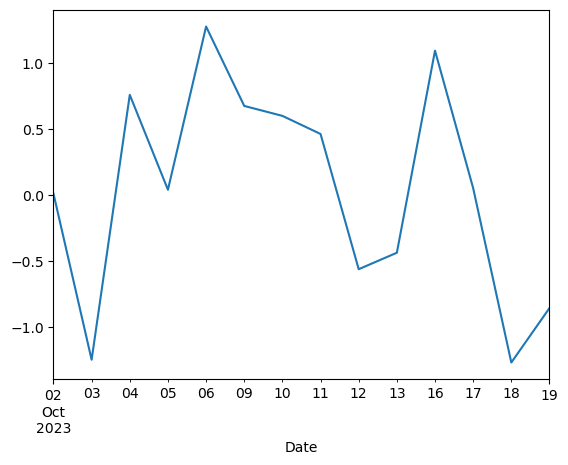

In [93]:
start_date = pd.to_datetime('2023-10-02')
end_date = pd.to_datetime('2023-10-19')
forecast = result_ar3_ma3.predict(start=start_date,end=end_date)
forecast.plot()

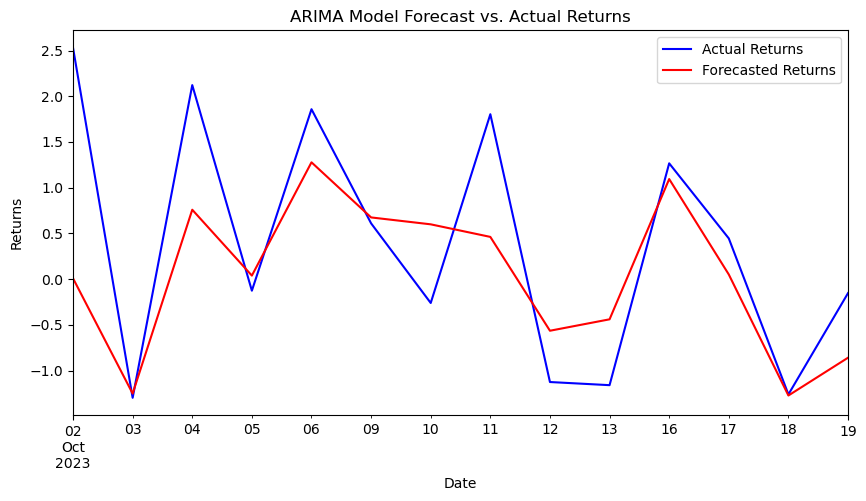

In [95]:
actual_returns = google['returns'].loc[start_date:end_date]
plt.figure(figsize=(10, 5))
actual_returns.plot(label='Actual Returns', color='blue')
forecast.plot(label='Forecasted Returns', color='red')
plt.legend()
plt.title('ARIMA Model Forecast vs. Actual Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming 'actual' and 'forecast' are the actual values and model predictions
mae = mean_absolute_error(actual_returns, forecast)*100
mse = mean_squared_error(actual_returns, forecast)*100
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 67.8921
Mean Squared Error (MSE): 90.2209
Root Mean Squared Error (RMSE): 9.4985


We can safely say that the ARIMA(3,1,3) is a better forecaster for returns and can be used in real time market